In [1]:
from animate import anim 
import numpy as np
import torch 
from model import PINNs
from deepxrte.geometry import Rectangle
import pandas as pd
from utils import charge_data
import json



In [2]:
hyper_param={
    "nb_points_axes": 6,  # le nombre de points pris par axe par pas de temps
    "x_min": -0.05,
    "x_max": 0.2,
    "y_min": -0.06,
    "y_max": 0.06,
    "t_min": 6.5,
    "t_max": 8,
}
param_adim = {
    'L': 0.025,
    'V': 2., 
    'rho': 1.2
}

In [3]:
# with open('results/5_good_param' + "/hyper_param.json", "r") as file:
#     hyper_param = json.load(file)

In [3]:
param_adim = {
    'L': 0.025,
    'V': 2., 
    'rho': 1.2
}

In [5]:
X_train, U_train, X_full, U_full, X_border, mean_std = charge_data(hyper_param, param_adim)

In [6]:
x_full = (X_full[:,0]*mean_std['x_std'] + mean_std['x_mean'])*param_adim['L']
y_full = (X_full[:,1]*mean_std['y_std'] + mean_std['y_mean'])*param_adim['L']
t_full = (X_full[:,2]*mean_std['t_std'] + mean_std['t_mean'])*(param_adim['L']/param_adim['V'])
u_full = (U_full[:,0]*mean_std['u_std'] + mean_std['u_mean'])*param_adim['V']
v_full = (U_full[:,1]*mean_std['v_std'] + mean_std['v_mean'])*param_adim['V']
p_full = (U_full[:,2]*mean_std['p_std'] + mean_std['p_mean'])*((param_adim['L']**2) * param_adim['rho'])

In [7]:
v = np.sqrt(u_full**2+v_full**2)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
0


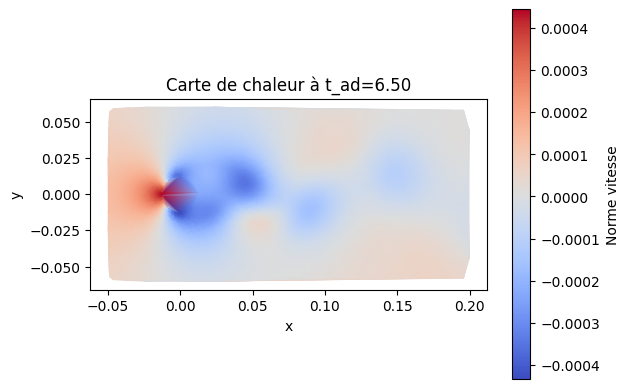

In [9]:
anim('data_pression.gif', x_full, y_full, t_full, p_full, fps=5)